In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
path_to_file = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-m-nurdaulet/transaction_data.csv')
transaction_data = path_to_file

In [3]:
transaction_data.info ()
# Display information about the transaction_data dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         5315 non-null   object
 1   name         5315 non-null   object
 2   transaction  5315 non-null   object
dtypes: object(3)
memory usage: 124.7+ KB


In [4]:
transaction_data.describe(include='all')

# Display descriptive statistics for all columns in the transaction_data dataset


,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:35:03,Masha_Ozerova,successfull
freq,6,112,3692


In [5]:
transaction_data.transaction.unique()

#Display unique values 

array(['cancelled', 'successfull', 'error'], dtype=object)

In [6]:
trans_vc=transaction_data.transaction.value_counts()

# Calculate the value counts for the 'transaction' column in the transaction_data dataset


In [7]:
trans_vc

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

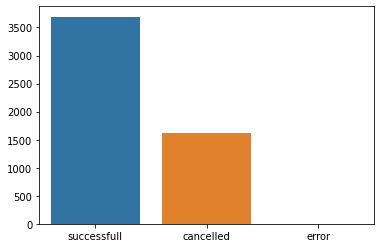

In [8]:
sns.barplot(x=trans_vc.index, y=trans_vc.values)
# Create a bar plot to visualize the distribution of transaction types

In [9]:
trans_vc['error']

#Number of transactions failed

4

In [10]:
success_per_user = transaction_data.loc[transaction_data.transaction == 'successfull'].groupby('name',as_index = False).size()

#Create a DataFrame to count the number of successful transactions per user in the transaction_data dataset

In [11]:
success_per_user.head()

,name,size
0,Ekaterina_Fedorova,72
1,Ekaterina_Ivanova,59
2,Ekaterina_Lesnova,63
3,Ekaterina_Ozerova,72
4,Ekaterina_Petrova,68


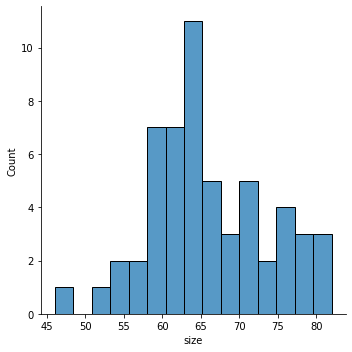

In [12]:
sns.displot(data=success_per_user, x ='size', bins= 15)
#Create a distribution plot to visualize the distribution of the number of successful transactions per user

In [13]:
success_per_user.describe()

,size
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


In [14]:
df = pd.read_csv('transaction_data_updated.csv')
#Read new updated data

In [15]:
df.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [16]:

df.dtypes

#datatypes

date           object
name           object
transaction    object
minute          int64
dtype: object

In [17]:
df= pd.read_csv('transaction_data_updated.csv',parse_dates=['date'])

# Parsing the 'date' column as dates allows for convenient handling and analysis of date-related information in the dataset.



In [18]:
trans_per_minute =df.groupby(['name', 'minute'], as_index=False).size()

# Create a DataFrame to count the number of transactions per minute for each user in the df dataset



In [19]:
trans_per_minute.head()

,name,minute,size
0,Ekaterina_Fedorova,0,3
1,Ekaterina_Fedorova,1,4
2,Ekaterina_Fedorova,2,1
3,Ekaterina_Fedorova,3,3
4,Ekaterina_Fedorova,4,3


In [20]:
pivot_trans_per_min =trans_per_minute.pivot(index='minute', columns='name', values='size')

# Pivot the trans_per_minute DataFrame to reshape the data with 'minute' as the index, 'name' as the columns, and 'size' as the values


In [21]:
pivot_trans_per_min= pivot_trans_per_min.fillna(0)

# Fill missing values in the pivot_trans_per_min DataFrame with zeros to ensure all cells have numerical values



In [22]:
pivot_trans_per_min.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


In [23]:
df['true_minute']= df.date.dt.minute + df.date.dt.hour * 60

# Create a new column 'true_minute' in the df DataFrame by combining the minute and hour components of the date


In [24]:
df.head()

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17


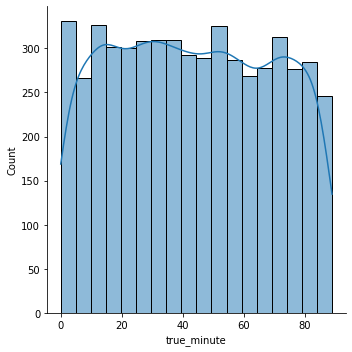

In [27]:
sns.displot(data= df, x='true_minute', kde=True)